## TUTORIAL OF PYTORCH API 04 ==> MNIST

In [47]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt
from torchsummary import summary
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

## 0_1_Setup GPU

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## 0_2_Setup Tensorboard

In [35]:
writer = SummaryWriter('runs/mnist2')

## 1_Download and Load dataset

In [4]:
import torch.utils
import torch.utils.data


train_dataset = torchvision.datasets.MNIST(
    train=True,
    transform=torchvision.transforms.ToTensor(),
    root='./data/',
    download=True,
)
test_dataset = torchvision.datasets.MNIST(
    train=False,
    transform=torchvision.transforms.ToTensor(),
    root='./data/',
    download=False,
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=100,
    shuffle=True,
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=100,
    shuffle=False,
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:09<00:00, 1098143.02it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 90738.35it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:10<00:00, 150834.96it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1617604.55it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## 2_Explore dataset

In [5]:
print("Number of batch_size training examples: ", len(train_loader))
print("Number of bacth_size test examples: ", len(test_loader))

Number of batch_size training examples:  600
Number of bacth_size test examples:  100


In [6]:
print("Number of batch_size * training examples: ", 100*len(train_loader))
print("Number of bacth_size * test examples: ", 100*len(test_loader))

Number of batch_size * training examples:  60000
Number of bacth_size * test examples:  10000


In [7]:
examples_train = iter(train_loader)
train_examples = next(examples_train)
x_images, x_labels = train_examples
print("Shape training-set of feature examples in one batch: ", x_images.shape)
print("Shape training-set of label examples in one batch: ", x_labels.shape)


Shape training-set of feature examples in one batch:  torch.Size([100, 1, 28, 28])
Shape training-set of label examples in one batch:  torch.Size([100])


In [8]:
print("One image shape: ",x_images[0].shape)
print("One label shape: ",x_labels[0].shape)
print("First label image: ", x_labels[0])
print("First image: \n",x_images[0])

One image shape:  torch.Size([1, 28, 28])
One label shape:  torch.Size([])
First label image:  tensor(3)
First image: 
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0

In [9]:
print(x_images[0][0].shape)

torch.Size([28, 28])


## 3_Normalize dataset --> PyTorch Normalization available(Skip Step)

## 4_Plot to visualize some examples

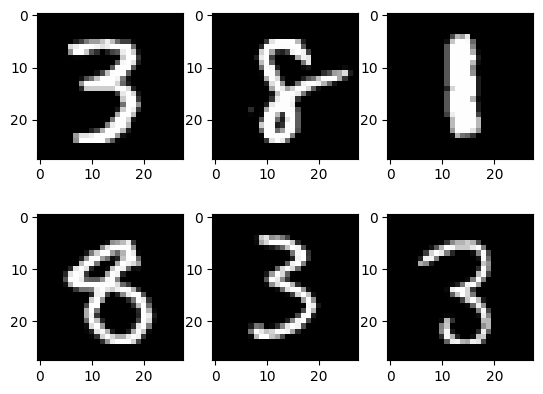

In [10]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(x_images[i][0], cmap='gray')
plt.show()

In [37]:
'''
    Plot by tensorboard
'''
img_grid = torchvision.utils.make_grid(x_images)
writer.add_image("imnist image", img_grid)
writer.close()

## 5_Build Model

In [38]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_size, hidden_size, number_class):
        super(NeuralNetwork, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(hidden_size, number_class)

    def forward(self, x):
        out = self.linear1.forward(x)
        out = self.relu(out)
        out = self.linear2.forward(out)
        return out

## 6_Select Hyperparameters for Model

In [39]:
input_size = 28*28
hidden_size = 512
number_class = 10
epochs = 5
batch_size = 100
learning_rate = 0.01

In [40]:
model = NeuralNetwork(
    input_size=input_size, 
    hidden_size=hidden_size,
    number_class=number_class
)

In [41]:
print(model)

NeuralNetwork(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=512, out_features=10, bias=True)
)


In [42]:
'''
    Plot model by tensorboard
'''
writer.add_graph(model, x_images.reshape(-1, 28*28))
writer.close()

In [43]:
''' if use CrossEntropy means that the model no need Softmax Layer at the end
    the output will be automatically generated probability
'''
losses = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [56]:
n_steps = len(train_loader)
running_loss = 0.0
running_accuracy = 0.0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader): #batch_size iterators
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        #forward propagation
        output = model(images)
        loss = losses(output, labels)

        #backward propagation
        loss.backward()
        
        #update parameters
        optimizer.step()
        optimizer.zero_grad()

        #calculate loss and accuracy
        _, predictions = torch.max(output, 1)
        running_loss += loss.item()
        running_accuracy += (predictions == labels).sum().item()


        if i % 100 == 0:
            print(f"epoch {epoch+1} / {epochs}, step {i} / {n_steps}, loss = {loss.item():.4f}")
            writer.add_scalar("training loss",scalar_value=(running_loss / 100 ), global_step=(epoch * n_steps + i))
            writer.add_scalar("training accuracy",scalar_value=(running_accuracy / 100 ), global_step=(epoch * n_steps + i))
            running_loss = 0.0
            running_accuracy = 0.0

        

epoch 1 / 5, step 0 / 600, loss = 0.0061
epoch 1 / 5, step 100 / 600, loss = 0.2052
epoch 1 / 5, step 200 / 600, loss = 0.0345
epoch 1 / 5, step 300 / 600, loss = 0.0226
epoch 1 / 5, step 400 / 600, loss = 0.1120
epoch 1 / 5, step 500 / 600, loss = 0.0744
epoch 2 / 5, step 0 / 600, loss = 0.0112
epoch 2 / 5, step 100 / 600, loss = 0.0601
epoch 2 / 5, step 200 / 600, loss = 0.0331
epoch 2 / 5, step 300 / 600, loss = 0.1744
epoch 2 / 5, step 400 / 600, loss = 0.0267
epoch 2 / 5, step 500 / 600, loss = 0.1319
epoch 3 / 5, step 0 / 600, loss = 0.0107
epoch 3 / 5, step 100 / 600, loss = 0.0228
epoch 3 / 5, step 200 / 600, loss = 0.1157
epoch 3 / 5, step 300 / 600, loss = 0.1319
epoch 3 / 5, step 400 / 600, loss = 0.0461
epoch 3 / 5, step 500 / 600, loss = 0.0383
epoch 4 / 5, step 0 / 600, loss = 0.0140
epoch 4 / 5, step 100 / 600, loss = 0.0918
epoch 4 / 5, step 200 / 600, loss = 0.0158
epoch 4 / 5, step 300 / 600, loss = 0.0162
epoch 4 / 5, step 400 / 600, loss = 0.0224
epoch 4 / 5, step 5

In [53]:
'''
    Save model with state_dict instead lazy method
'''
torch.save(model.state_dict(), 'model.pth')

In [54]:
'''
    Load model with state_dict
'''
model_inference = NeuralNetwork(
    input_size=input_size, 
    hidden_size=hidden_size,
    number_class=number_class
)
model_inference.load_state_dict(torch.load('model.pth'))

/var/folders/fs/m259vy750f978kmv71pgmwgw0000gn/T/ipykernel_9034/2951817353.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_inference.load_state_dict(torch.load('mo

<All keys matched successfully>

In [ ]:
'''
    Use for checkpoint training
'''
checkpoint ={
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss
}
#torch.save(checkpoint, 'checkpoint.pth') 

'''
    Load checkpoint and continue training
'''
model_checkpoint = NeuralNetwork(
    input_size=input_size, 
    hidden_size=hidden_size,
    number_class=number_class
)
checkpoint = torch.load('checkpoint.pth')
model_checkpoint.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
# model_checkpoint.train()

## 7_Evaluation Model

In [55]:
model_inference.eval()
targets =[]
preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i,(images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model_inference(images)
        _, predictions = torch.max(outputs, 1)

        class_preds = [F.softmax(output, dim=0) for output in outputs]
        preds.append(class_preds)
        targets.append(predictions)
        print(f"Prediction at batch {i}-th {predictions}")
        n_samples += len(labels)
        n_correct += (predictions == labels).sum().item()

    preds = torch.cat([torch.stack(batch) for batch in preds])
    targets = torch.cat(targets)
accuracy = 100*n_correct / n_samples
print("Accuracy of Model: ", accuracy)

Prediction at batch 0-th tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 9, 1, 4,
        1, 7, 6, 9])
Prediction at batch 1-th tensor([6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6,
        7, 4, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2,
        0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7,
        2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3,
        1, 6, 4, 2])
Prediction at batch 2-th tensor([3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7,
        1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6,
        4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0,
   

In [52]:
for i in range(10):
    labels_i = targets == i
    preds_i = preds[:, i]
    writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
    writer.close()